<a href="https://colab.research.google.com/github/nguyetmle/voting-distortion/blob/main/Voting_Distortion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



In [24]:
#read the output file
df = pd.read_csv("output3D.csv")
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      8000 non-null   int64  
 1   n                          8000 non-null   int64  
 2   m                          8000 non-null   int64  
 3   Dimension                  8000 non-null   object 
 4   Distribution               8000 non-null   object 
 5   OPT                        8000 non-null   object 
 6   Plurality                  8000 non-null   object 
 7   Plurality Distortion       8000 non-null   float64
 8   Copeland                   8000 non-null   object 
 9   Copeland Distortion        8000 non-null   float64
 10  STV                        8000 non-null   object 
 11  STV Distortion             8000 non-null   object 
 12  Borda                      8000 non-null   object 
 13  Borda Distortion           8000 non-null   float

In [25]:
#make sure all distortion columns are numeric
df.loc[df["STAR Distortion"] == "False", "STAR Distortion"] = np.nan
df.loc[df["STV Distortion"] == "False", "STV Distortion"] = np.nan
df["STAR Distortion"] = pd.to_numeric(df["STAR Distortion"], errors="coerce")
df["STV Distortion"] = pd.to_numeric(df["STV Distortion"], errors="coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      8000 non-null   int64  
 1   n                          8000 non-null   int64  
 2   m                          8000 non-null   int64  
 3   Dimension                  8000 non-null   object 
 4   Distribution               8000 non-null   object 
 5   OPT                        8000 non-null   object 
 6   Plurality                  8000 non-null   object 
 7   Plurality Distortion       8000 non-null   float64
 8   Copeland                   8000 non-null   object 
 9   Copeland Distortion        8000 non-null   float64
 10  STV                        8000 non-null   object 
 11  STV Distortion             6160 non-null   float64
 12  Borda                      8000 non-null   object 
 13  Borda Distortion           8000 non-null   float

In [26]:
df.head()

,index,n,m,Dimension,Distribution,OPT,Plurality,Plurality Distortion,Copeland,Copeland Distortion,STV,STV Distortion,Borda,Borda Distortion,STAR,STAR Distortion,Plurality Veto,Plurality Veto Distortion
0,0,200,5,3D,normal,Candidate 0,Candidate 0,1.000000,Candidate 0,1.00000,Candidate 0,1.00000,Candidate 2,1.009384,Candidate 0,1.0,Candidate 0,1.00000
1,1,200,5,3D,normal,Candidate 3,Candidate 3,1.000000,Candidate 3,1.00000,Candidate 3,1.00000,Candidate 3,1.000000,Candidate 3,1.0,Candidate 3,1.00000
2,2,200,5,3D,normal,Candidate 4,Candidate 4,1.000000,Candidate 4,1.00000,Candidate 4,1.00000,Candidate 4,1.000000,Candidate 4,1.0,Candidate 4,1.00000
3,3,200,5,3D,normal,Candidate 4,Candidate 0,1.024980,Candidate 0,1.02498,Candidate 0,1.02498,Candidate 4,1.000000,Candidate 4,1.0,Candidate 0,1.02498
4,4,200,5,3D,normal,Candidate 0,Candidate 2,1.093179,Candidate 0,1.00000,Candidate 0,1.00000,Candidate 0,1.000000,Candidate 0,1.0,Candidate 0,1.00000


In [27]:
#group by distribution, n, m
group_by_all = df.groupby(["Distribution", "n", "m"]).agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max"))

In [28]:
group_by_all

Plurality_Distortion_avg  Plurality_Distortion_max  \
Distribution n   m                                                         
bimodal      200 5                    1.095154                  1.474963   
                 10                   1.106254                  1.382922   
                 50                   1.159473                  1.458887   
                 100                  1.180924                  1.522326   
normal       200 5                    1.021524                  1.398395   
                 10                   1.060434                  1.469511   
                 50                   1.192446                  1.633690   
                 100                  1.261693                  1.842493   
poisson      200 5                    1.016833                  1.345271   
                 10                   1.050013                  1.439432   
                 50                   1.187907                  1.658874   
                 100                  1.245405                  1.838294   
uniform      200 5                    1.033878                  1.313999   
                 10                   1.084146                  1.493759   
                 50                   1.246942                  1.646280   
                 100                  1.300162                  1.772368   

                      Copeland_Distortion_avg  Copeland_Distortion_max  \
Distribution n   m                                                       
bimodal      200 5                   1.040069                 1.356821   
                 10                  1.026232                 1.223856   
                 50                  1.017931                 1.130588   
                 100                 1.012404                 1.110257   
normal       200 5                   1.000694                 1.040387   
                 10                  1.000600                 1.034084   
                 50                  1.001151                 1.028600   
                 100                 1.000845                 1.034339   
poisson      200 5                   1.000470                 1.033397   
                 10                  1.001078                 1.053514   
                 50                  1.001290                 1.033789   
                 100                 1.001774                 1.026734   
uniform      200 5                   1.001011                 1.063234   
                 10                  1.000657                 1.035365   
                 50                  1.000827                 1.029626   
                 100                 1.000904                 1.033382   

                      STV_Distortion_avg  STV_Distortion_max  \
Distribution n   m                                             
bimodal      200 5              1.032050            1.305898   
                 10             1.053491            1.195580   
                 50             1.100395            1.259709   
                 100            1.090681            1.196726   
normal       200 5              1.002566            1.143419   
                 10             1.011014            1.150458   
                 50             1.057347            1.245882   
                 100            1.070516            1.244502   
poisson      200 5              1.003047            1.152480   
                 10             1.008805            1.145723   
                 50             1.060986            1.238913   
                 100            1.069245            1.239333   
uniform      200 5              1.004859            1.155445   
                 10             1.014399            1.237669   
                 50             1.088274            1.270866   
                 100            1.100719            1.312521   

                      Borda_Distortion_avg  Borda_Distortion_max  \
Distribution n   m                                                 
bimodal      200 5             

In [29]:
group_by_distribution  = df.groupby("Distribution").agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max"))

In [30]:
group_by_distribution

,Plurality_Distortion_avg,Plurality_Distortion_max,Copeland_Distortion_avg,Copeland_Distortion_max,STV_Distortion_avg,STV_Distortion_max,Borda_Distortion_avg,Borda_Distortion_max,STAR_Distortion_avg,STAR_Distortion_max,PluralityVeto_Distortion_avg,PluralityVeto_Distortion_max
Distribution,,,,,,,,,,,,
bimodal,1.135451,1.522326,1.024159,1.356821,1.060578,1.305898,1.039887,1.356821,1.007002,1.167384,1.025614,1.356821
normal,1.134025,1.842493,1.000823,1.040387,1.035319,1.245882,1.001593,1.124142,1.001377,1.036902,1.008085,1.113875
poisson,1.125040,1.838294,1.001153,1.053514,1.035539,1.239333,1.001726,1.099515,1.001962,1.055688,1.008268,1.124620
uniform,1.166282,1.772368,1.000850,1.063234,1.052043,1.312521,1.001703,1.135851,1.000814,1.041892,1.012274,1.171168


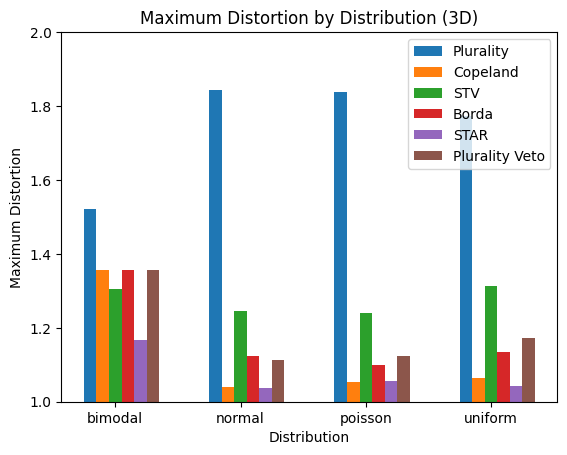

In [31]:

# Extract the data
distribution = group_by_distribution.index
plurality_max = group_by_distribution["Plurality_Distortion_max"]
copeland_max = group_by_distribution["Copeland_Distortion_max"]
stv_max = group_by_distribution["STV_Distortion_max"]
borda_max = group_by_distribution["Borda_Distortion_max"]
star_max = group_by_distribution["STAR_Distortion_max"]
pluralityVeto_max = group_by_distribution["PluralityVeto_Distortion_max"]

# Set the width of each bar
bar_width = 0.1

# Define x-axis positions for the bars
x = np.arange(len(distribution))

# Create the bar plots for each distortion metric
plt.bar(x - 2 * bar_width, plurality_max, width=bar_width, label="Plurality")
plt.bar(x - bar_width, copeland_max, width=bar_width, label="Copeland")
plt.bar(x, stv_max, width=bar_width, label="STV")
plt.bar(x + bar_width, borda_max, width=bar_width, label="Borda")
plt.bar(x + 2 * bar_width, star_max, width=bar_width, label="STAR")
plt.bar(x + 3 * bar_width, pluralityVeto_max, width=bar_width, label="Plurality Veto")

# Customize the plot
plt.xlabel("Distribution")
plt.ylabel("Maximum Distortion")
plt.title("Maximum Distortion by Distribution (3D)")
plt.xticks(x, distribution)
plt.ylim(1,2)
plt.legend()

# Show the plot
plt.show()



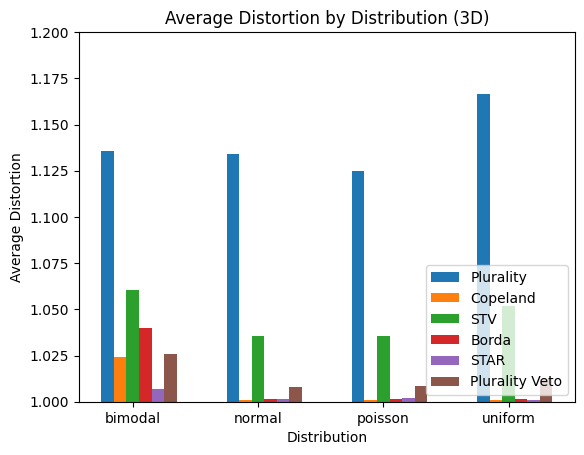

In [15]:
# Extract the data
distribution = group_by_distribution.index
plurality_avg = group_by_distribution["Plurality_Distortion_avg"]
copeland_avg = group_by_distribution["Copeland_Distortion_avg"]
stv_avg = group_by_distribution["STV_Distortion_avg"]
borda_avg = group_by_distribution["Borda_Distortion_avg"]
star_avg = group_by_distribution["STAR_Distortion_avg"]
pluralityVeto_avg = group_by_distribution["PluralityVeto_Distortion_avg"]

# Set the width of each bar
bar_width = 0.1

# Define x-axis positions for the bars
x = np.arange(len(distribution))

# Create the bar plots for each distortion metric
plt.bar(x - 2 * bar_width, plurality_avg, width=bar_width, label="Plurality")
plt.bar(x - bar_width, copeland_avg, width=bar_width, label="Copeland")
plt.bar(x, stv_avg, width=bar_width, label="STV")
plt.bar(x + bar_width, borda_avg, width=bar_width, label="Borda")
plt.bar(x + 2 * bar_width, star_avg, width=bar_width, label="STAR")
plt.bar(x + 3 * bar_width, pluralityVeto_avg, width=bar_width, label="Plurality Veto")

# Customize the plot
plt.xlabel("Distribution")
plt.ylabel("Average Distortion")
plt.title("Average Distortion by Distribution (3D)")
plt.xticks(x, distribution)
plt.ylim(1,1.2)
plt.legend(loc='lower right')




In [16]:
group_by_m = df.groupby("m").agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max"))
group_by_m

,Plurality_Distortion_avg,Plurality_Distortion_max,Copeland_Distortion_avg,Copeland_Distortion_max,STV_Distortion_avg,STV_Distortion_max,Borda_Distortion_avg,Borda_Distortion_max,STAR_Distortion_avg,STAR_Distortion_max,PluralityVeto_Distortion_avg,PluralityVeto_Distortion_max
m,,,,,,,,,,,,
5,1.041847,1.474963,1.010561,1.356821,1.005241,1.305898,1.010263,1.356821,1.001570,1.167384,1.010104,1.356821
10,1.075212,1.493759,1.007142,1.223856,1.013295,1.237669,1.012083,1.245952,1.001898,1.126894,1.009506,1.261174
50,1.196692,1.658874,1.005300,1.130588,1.069774,1.270866,1.010908,1.125776,1.002535,1.069210,1.015800,1.196682
100,1.247046,1.842493,1.003982,1.110257,1.080456,1.312521,1.011654,1.105969,1.003839,1.074719,1.018830,1.171168


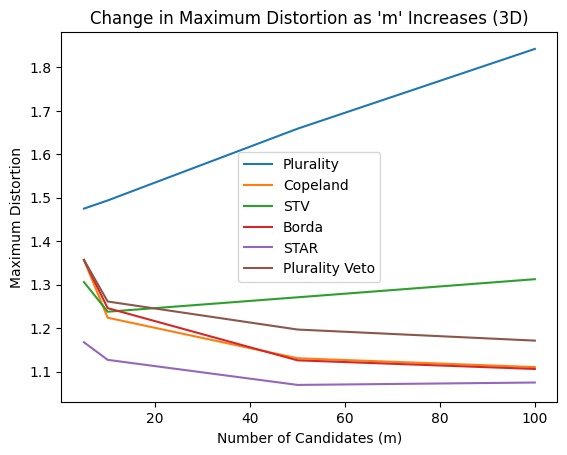

In [17]:
plt.plot(group_by_m.index, group_by_m["Plurality_Distortion_max"], label="Plurality")
plt.plot(group_by_m.index, group_by_m["Copeland_Distortion_max"], label="Copeland")
plt.plot(group_by_m.index, group_by_m["STV_Distortion_max"], label="STV")
plt.plot(group_by_m.index, group_by_m["Borda_Distortion_max"], label="Borda")
plt.plot(group_by_m.index, group_by_m["STAR_Distortion_max"], label="STAR")
plt.plot(group_by_m.index, group_by_m["PluralityVeto_Distortion_max"], label="Plurality Veto")

# Customize the plot
plt.xlabel("Number of Candidates (m)")
plt.ylabel("Maximum Distortion")
plt.title("Change in Maximum Distortion as 'm' Increases (3D)")
plt.legend()


# Show the plot
plt.show()

In [ ]:
# group_by_n = df.groupby("n").agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"))
# group_by_n

In [ ]:
# plt.plot(group_by_n.index, group_by_n["Plurality_Distortion_max"], label="Plurality")
# plt.plot(group_by_n.index, group_by_n["Copeland_Distortion_max"], label="Copeland")
# plt.plot(group_by_n.index, group_by_n["STV_Distortion_max"], label="STV")
# plt.plot(group_by_n.index, group_by_n["Borda_Distortion_max"], label="Borda")
# plt.plot(group_by_n.index, group_by_n["STAR_Distortion_max"], label="STAR")

# # Customize the plot
# plt.xlabel("Number of Voters (n)")
# plt.ylabel("Maximum Distortion")
# plt.title("Change in Maximum Distortion as 'n' Increases")
# plt.legend()


# # Show the plot
# plt.show()

In [18]:
# Define the target value
target_value = 1

# Group by 'Distribution' and calculate the percentage of each methods choosing the OPT
accuracy_by_distribution = df.groupby('Distribution').agg(
    Plurality_percentage=('Plurality Distortion', lambda x: (x == target_value).mean() * 100),
    Copeland_percentage=('Copeland Distortion', lambda x: (x == target_value).mean() * 100),
    STV_percentage=('STV Distortion', lambda x: (x == target_value).mean() * 100),
    STAR_percentage=('STAR Distortion', lambda x: (x == target_value).mean() * 100),
    Borda_percentage=('Borda Distortion', lambda x: (x == target_value).mean() * 100),
    PluralityVeto_percentage=('Plurality Veto Distortion', lambda x: (x == target_value).mean() * 100)

).reset_index()

In [19]:
accuracy_by_distribution

,Distribution,Plurality_percentage,Copeland_percentage,STV_percentage,STAR_percentage,Borda_percentage,PluralityVeto_percentage
0,bimodal,9.15,45.70,3.50,47.1,27.30,42.55
1,normal,29.15,90.00,46.15,82.4,86.55,65.80
2,poisson,31.80,85.85,44.75,78.7,85.25,65.65
3,uniform,26.15,90.15,42.50,87.5,88.10,63.80


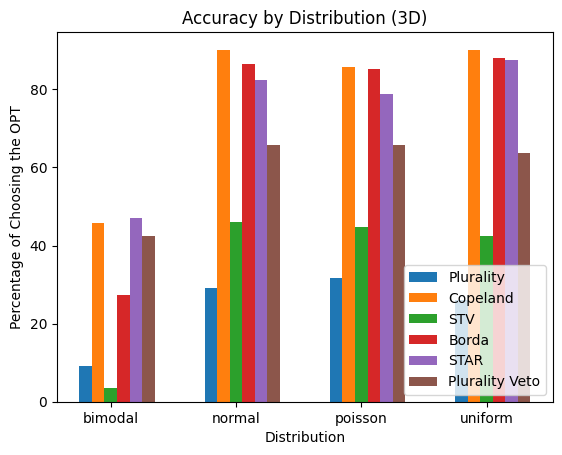

In [20]:
# Extract the data
distribution = accuracy_by_distribution["Distribution"]

# Set the width of each bar
bar_width = 0.1

# Define x-axis positions for the bars
x = np.arange(len(distribution))

# Create the bar plots for each distortion metric
plt.bar(x - 2 * bar_width, accuracy_by_distribution["Plurality_percentage"], width=bar_width, label="Plurality")
plt.bar(x - bar_width, accuracy_by_distribution["Copeland_percentage"], width=bar_width, label="Copeland")
plt.bar(x, accuracy_by_distribution["STV_percentage"], width=bar_width, label="STV")
plt.bar(x + bar_width, accuracy_by_distribution["Borda_percentage"], width=bar_width, label="Borda")
plt.bar(x + 2 * bar_width, accuracy_by_distribution["STAR_percentage"], width=bar_width, label="STAR")
plt.bar(x + 3 * bar_width, accuracy_by_distribution["PluralityVeto_percentage"], width=bar_width, label="Plurality Veto")

# Customize the plot
plt.xlabel("Distribution")
plt.ylabel("Percentage of Choosing the OPT")
plt.title("Accuracy by Distribution (3D)")
plt.xticks(x, distribution)
plt.legend(loc='lower right')


In [21]:
# Define the target value
target_value = 1

# Group by 'Distribution' and calculate the percentage of each methods choosing the OPT
accuracy_by_m = df.groupby('m').agg(
    Plurality_percentage=('Plurality Distortion', lambda x: (x == target_value).mean() * 100),
    Copeland_percentage=('Copeland Distortion', lambda x: (x == target_value).mean() * 100),
    STV_percentage=('STV Distortion', lambda x: (x == target_value).mean() * 100),
    STAR_percentage=('STAR Distortion', lambda x: (x == target_value).mean() * 100),
    Borda_percentage=('Borda Distortion', lambda x: (x == target_value).mean() * 100),
    PluralityVeto_percentage=('Plurality Veto Distortion', lambda x: (x == target_value).mean() * 100)
)
accuracy_by_m

,Plurality_percentage,Copeland_percentage,STV_percentage,STAR_percentage,Borda_percentage,PluralityVeto_percentage
m,,,,,,
5,57.50,82.95,68.60,82.20,82.15,81.80
10,33.75,81.90,54.20,81.65,74.90,73.00
50,3.85,73.75,9.25,70.85,66.40,49.05
100,1.15,73.10,4.85,61.00,63.75,33.95


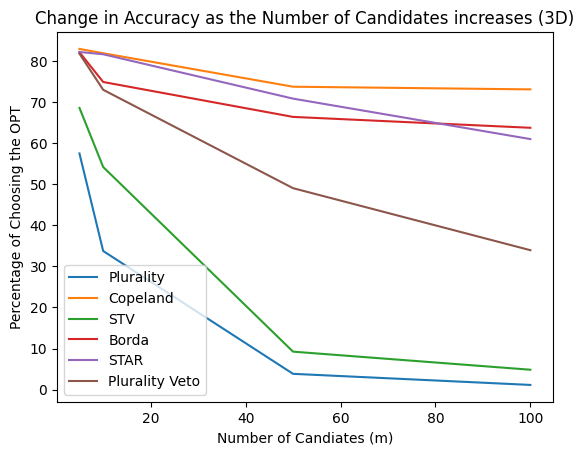

In [22]:
plt.plot(accuracy_by_m.index, accuracy_by_m["Plurality_percentage"], label="Plurality")
plt.plot(accuracy_by_m.index, accuracy_by_m["Copeland_percentage"], label="Copeland")
plt.plot(accuracy_by_m.index, accuracy_by_m["STV_percentage"], label="STV")
plt.plot(accuracy_by_m.index, accuracy_by_m["Borda_percentage"], label="Borda")
plt.plot(accuracy_by_m.index, accuracy_by_m["STAR_percentage"], label="STAR")
plt.plot(accuracy_by_m.index, accuracy_by_m["PluralityVeto_percentage"], label="Plurality Veto")

# Customize the plot
plt.xlabel("Number of Candiates (m)")
plt.ylabel("Percentage of Choosing the OPT")
plt.title("Change in Accuracy as the Number of Candidates increases (3D)")
plt.legend()


# Show the plot
plt.show()